# Diagram Tests

## Setup

### Imports

In [2]:
# Type imports
from typing import Any, Dict, Tuple

# Standard Libraries
from pathlib import Path
from math import sqrt, pi, sin, cos, tan, radians
from statistics import mean
from itertools import zip_longest

# Shared Packages
import pandas as pd
import xlwings as xw
import matplotlib.pyplot as plt

import PySimpleGUI as sg


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pygraphviz as pgv


In [4]:
%matplotlib inline

In [5]:
graph_str = '''
graph SimpleTest {
graph [label = "Test graph\n"]
Node1 [shape = "pentagon", color = "#ff0000", label = "Node1", style="filled"]
Node2 [shape = "hexagon", color = "#FFFF00" label = "Node2"]
Node1 -- Node2 [style = "tapered", penwidth="5", dir=both]
Node1 [tooltip = "This is Node1"]
}
'''

In [11]:
structure_set_graph_str = '''
graph StructureSet {
    graph [labelloc = t,
          clusterrank=none,
          bgcolor="#555555",
          fontname = "Helvetica,Arial,sans-serif",
          fontsize = 16,
          fontcolor = "white"
          ]
    node [fixedsize = "shape",
          width = 1,
          height = .6,
          fontname = "Helvetica-Bold",
          fontsize = 12,
          labelloc = "c",
          penwidth = 3,
          style="filled",
          fontcolor = "black"
          ]
    edge [color = "#e27dd6ff",
          penwidth = 3,
          style = "solid",
          arrowhead = "none",
          arrowtail = "none",
          labelfloat=false,
          labelfontname = "Cambria",
          fontcolor = "#55AAFF",
          fontsize = "10"
          ]
    subgraph Targets {
        cluster = true;
        GTV [class = "Target", shape = "pentagon", color = "#ff0000", label = "GTV"]
        CTV [class= "Target", shape = "hexagon", color = "#FFFF00" label = "CTV"]
        PTV [class= "Target", shape = "octagon", color = "#00FFFF", label = "PTV"]
        eval_PTV [class= "Target", shape = "octagon" color = "#00FFFF" label = "eval PTV"]
        }
    subgraph OAR {cluster = true;
        node [shape = "rectangle" style="rounded, filled"]
        Lung_L [class= "OAR", color = "#E0FFFF", label = "Lung L"]
        Lung_R [class= "OAR", color = "#FFDAB9" label = "Lung R"]
        Lung_B [class= "OAR", color = "#DAA532", label = "Lung B"]
        Skin [class= "OAR", color = "#F0FFF0", label = "Skin"]
        }
    subgraph External {cluster = true;
        Body [class= "External", shape = "oval", color = "#00ff00", label = "Body"]
        }
graph [label = "Example Structure Relations\n"]

GTV -- CTV [class = "Equals", style = "tapered", penwidth="5", dir=both]
GTV -- PTV [class = "Contain", style = "dotted",  penwidth=1]
GTV -- eval_PTV [class = "Contain", style = "dotted", penwidth=1]
GTV -- Skin [class = "Island", style = "dotted", headlabel="Embeds", taillabel="Surrounds"]
GTV -- Lung_L [class = "Contain", style = "dotted", penwidth=1]
GTV -- Lung_B [class = "Contain", style = "dotted", penwidth=1]
CTV -- PTV [class = "Contain", style = "tapered", penwidth="5", dir=forward]
#CTV -- eval_PTV [label="Contain"]
CTV -- Skin [class = "Island", style = "dotted", headlabel="Embeds", taillabel="Surrounds"]
CTV -- Lung_L [class = "Contain", style = "dotted",]
#CTV -- Lung_B [label="Contain"]
PTV -- eval_PTV [class = "Group", style = "solid", headlabel="Incorporates", taillabel="Partitions"]
#PTV -- Skin [label="Island"]
PTV -- Lung_L [label="Overlaps", style = "bold"]
#PTV -- Lung_B [label="Overlaps"]
#eval_PTV -- Skin [label="Island"]
eval_PTV -- Lung_L [class = "Group", style = "solid", headlabel="Partitions", taillabel="Incorporates"]
#eval_PTV -- Lung_B [label="Contain"]
Lung_L -- Lung_B [class = "Contain", style = "tapered", penwidth="5", dir=back]
Lung_R -- Lung_B [class = "Contain", style = "tapered", penwidth="5", dir=back]
#Body -- GTV [label="Contain"]
#Body -- CTV [label="Contain"]
#Body -- PTV [label="Contain"]
#Body -- eval_PTV [label="Contain"]
Body -- Skin [class = "Cut-out", style = "dashed",  headlabel="Partitions", taillabel="Incorporates"]
Body -- Lung_L [class = "Contain", style = "tapered", penwidth="5", dir=forward]
Body -- Lung_R [class = "Contain", style = "tapered", penwidth="5", dir=forward]
Body -- Lung_B [class = "Contain", style = "tapered", penwidth="5", dir=forward]
GTV [tooltip = "ID: GTV\r\nROI: 38\r\n\r\nVolumeType: GTV\r\nDicomType: GTV\r\nCode: GTVp\r\nLabel: Primary Gross Tumor Volume\r\nScheme: 99VMS_STRUCTCODE\r\nVolume: 8.0\r\nEq Sp Diam: 2.5\r\nLength: 2.6\r\nRange: (-0.4, -3.0)"]
CTV [tooltip = "ID: CTV\r\nROI: 24\r\nName: Internal Target Volume\r\nVolumeType: CTV\r\nDicomType: CTV\r\nCode: ITV\r\nLabel: Internal Target Volume\r\nScheme: 99VMS_STRUCTCODE\r\nVolume: 34.4\r\nEq Sp Diam: 4.0\r\n\r\nLength: 3.6\r\nRange: (0.0, -3.6)"]
PTV [tooltip = "ID: PTV\r\nROI: 30\r\nName: PTV defined by Radiation Oncologist\r\nVolumeType: PTV\r\nDicomType: PTV\r\nCode: PTVp\r\nLabel: Primary Planning Target Volume\r\nScheme: 99VMS_STRUCTCODE\r\nVolume: 74.6\r\nEq Sp Diam: 5.2\r\n\r\nLength: 4.6\r\nRange: (0.6, -4.0)"]
Body [tooltip = "ID: Body\r\nROI: 1\r\n\r\nVolumeType: BODY\r\nDicomType: EXTERNAL\r\nCode: BODY\r\nLabel: Body\r\nScheme: 99VMS_STRUCTCODE\r\nVolume: 28,951.6\r\nEq Sp Diam: 38.1\r\nRadius: 16.5\r\nLength: 33.8\r\nRange: (10.6, -23.2)"]
eval_PTV [tooltip = "ID: eval_PTV\r\nROI: 41\r\nName: PTV High Risk for dvh\r\nVolumeType: PTV\r\nDicomType: PTV\r\nCode: PTVp\r\nLabel: Primary Planning Target Volume\r\nScheme: 99VMS_STRUCTCODE\r\nVolume: 630.6\r\nEq Sp Diam: 10.6\r\n\r\nLength: 9.8\r\nRange: (1.4, -8.4)"]
Lung_L [tooltip = "ID: Lung_L\r\nROI: 26\r\nName: Left Lung\r\nVolumeType: Organ\r\nDicomType: ORGAN\r\nCode: 7310\r\nLabel: Left lung\r\nScheme: FMA\r\nVolume: 1,776.0\r\nEq Sp Diam: 15.0\r\n\r\nLength: 24.2\r\nRange: (5.8, -18.4)"]
Lung_R [tooltip = "ID: Lung_R\r\nROI: 27\r\nName: Right Lung\r\nVolumeType: Organ\r\nDicomType: ORGAN\r\nCode: 7309\r\nLabel: Right lung\r\nScheme: FMA\r\nVolume: 2,556.7\r\nEq Sp Diam: 17.0\r\n\r\nLength: 23.8\r\nRange: (6.6, -17.2)"]
Lung_B [tooltip = "ID: Lung_B\r\nROI: 25\r\nName: Both Lungs\r\nVolumeType: Organ\r\nDicomType: ORGAN\r\nCode: 68877\r\nLabel: Pair of lungs\r\nScheme: FMA\r\nVolume: 4,332.7\r\nEq Sp Diam: 20.2\r\n\r\nLength: 25.0\r\nRange: (6.6, -18.4)"]
Skin [tooltip = "ID: Skin\r\n\r\nName: Skin\r\nVolumeType: Organ\r\nDicomType: Organ\r\nCode: 7163\r\nLabel: Skin\r\nScheme: FMA\r\nVolume: 1,072.3\r\n\r\n\r\nLength: 33.8\r\nRange: (10.6, -23.2)"]
}
'''

In [12]:
g = pgv.AGraph(structure_set_graph_str)
g.layout(prog='dot')

In [13]:
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')
%matplotlib inline

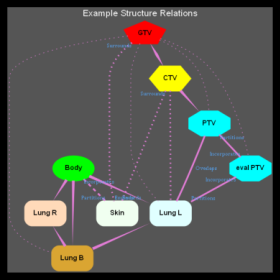

In [14]:
folder=Path.cwd()
name='test_graph'
full_dot_name = name + '.gv'
full_png_name = name + '.png'
full_svg_name = name + '.svg'
dot_path = folder / full_dot_name
png_path = folder / full_png_name
svg_path = folder / full_svg_name

g.draw(png_path)
g.draw(svg_path)
img = mpimg.imread(png_path)
fig, ax = plt.subplots()
ax.imshow(img)
ax.axis('off')
plt.show()

TypeError: Image data of dtype object cannot be converted to float

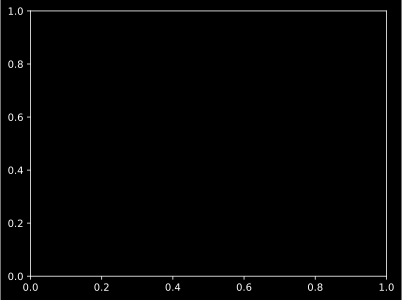

In [10]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage



# Create a figure and axis
fig, ax = plt.subplots()

# Display the SVG image
img = OffsetImage(svg_path)
ax.add_artist(img)

# Set axis limits
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Hide axes
ax.axis('off')

# Show the plot
plt.show()


In [35]:
#!/usr/bin/env python
import PySimpleGUI as sg
import os
from PIL import Image, ImageTk
import io

"""
Simple Image Browser based on PySimpleGUI
--------------------------------------------
There are some improvements compared to the PNG browser of the repository:
1. Paging is cyclic, i.e. automatically wraps around if file index is outside
2. Supports all file types that are valid PIL images
3. Limits the maximum form size to the physical screen
4. When selecting an image from the listbox, subsequent paging uses its index
5. Paging performance improved significantly because of using PIL

Dependecies
------------
Python3
PIL

Copyright 2023 PySimpleSoft, Inc. and/or its licensors. All rights reserved.

Redistribution, modification, or any other use of PySimpleGUI or any portion thereof is subject to the terms of the PySimpleGUI License Agreement available at https://eula.pysimplegui.com.

You may not redistribute, modify or otherwise use PySimpleGUI or its contents except pursuant to the PySimpleGUI License Agreement.
"""

# Get the folder containin:g the images from the user
folder = sg.popup_get_folder('Image folder to open', default_path='')
if not folder:
    sg.popup_cancel('Cancelling')
    raise SystemExit()

# PIL supported image types
img_types = (".png", ".jpg", "jpeg", ".tiff", ".bmp")

# get list of files in folder
flist0 = os.listdir(folder)

# create sub list of image files (no sub folders, no wrong file types)
fnames = [f for f in flist0 if os.path.isfile(
    os.path.join(folder, f)) and f.lower().endswith(img_types)]

num_files = len(fnames)                # number of iamges found
if num_files == 0:
    sg.popup('No files in folder')
    raise SystemExit()

del flist0                             # no longer needed

# ------------------------------------------------------------------------------
# use PIL to read data of one image
# ------------------------------------------------------------------------------


def get_img_data(f, maxsize=(1200, 850), first=False):
    """Generate image data using PIL
    """
    img = Image.open(f)
    img.thumbnail(maxsize)
    if first:                     # tkinter is inactive the first time
        bio = io.BytesIO()
        img.save(bio, format="PNG")
        del img
        return bio.getvalue()
    return ImageTk.PhotoImage(img)
# ------------------------------------------------------------------------------


# make these 2 elements outside the layout as we want to "update" them later
# initialize to the first file in the list
filename = os.path.join(folder, fnames[0])  # name of first file in list
image_elem = sg.Image(data=get_img_data(filename, first=True))
filename_display_elem = sg.Text(filename, size=(80, 3))
file_num_display_elem = sg.Text('File 1 of {}'.format(num_files), size=(15, 1))

# define layout, show and read the form
col = [[filename_display_elem],
       [image_elem]]

col_files = [[sg.Listbox(values=fnames, change_submits=True, size=(60, 30), key='listbox')],
             [sg.Button('Next', size=(8, 2)), sg.Button('Prev', size=(8, 2)), file_num_display_elem]]

layout = [[sg.Column(col_files), sg.Column(col)]]

window = sg.Window('Image Browser', layout, return_keyboard_events=True,
                   location=(0, 0), use_default_focus=False)

# loop reading the user input and displaying image, filename
i = 0
while True:
    # read the form
    event, values = window.read()
    print(event, values)
    # perform button and keyboard operations
    if event == sg.WIN_CLOSED:
        break
    elif event in ('Next', 'MouseWheel:Down', 'Down:40', 'Next:34'):
        i += 1
        if i >= num_files:
            i -= num_files
        filename = os.path.join(folder, fnames[i])
    elif event in ('Prev', 'MouseWheel:Up', 'Up:38', 'Prior:33'):
        i -= 1
        if i < 0:
            i = num_files + i
        filename = os.path.join(folder, fnames[i])
    elif event == 'listbox':            # something from the listbox
        f = values["listbox"][0]            # selected filename
        filename = os.path.join(folder, f)  # read this file
        i = fnames.index(f)                 # update running index
    else:
        filename = os.path.join(folder, fnames[i])

    # update window with new image
    image_elem.update(data=get_img_data(filename, first=True))
    # update window with filename
    filename_display_elem.update(filename)
    # update page display
    file_num_display_elem.update('File {} of {}'.format(i+1, num_files))

window.close()

Next {'listbox': []}
None None


In [ ]:
import matplotlib.font_manager as font_manager

def list_available_fonts():
    # Get a list of the available font names
    fonts = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
    font_names = [font_manager.FontProperties(fname=font).get_name() for font in fonts]
    return set(font_names)  # Use a set to remove duplicates

# Example usage
if __name__ == '__main__':
    available_fonts = list_available_fonts()
    print("Available fonts for PyGraphviz on Windows 10:")
    for font in sorted(available_fonts):
        print(font)
